# Exploratory Data Analysis

Chapter 1, Lesson 1

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from distribution import Pmf, Cdf

## Loading and validation

Downloaded November 16, 2018:

* ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NSFG 

* ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NSFG/stata/

In [2]:
nsfg = utils.read_stata('data/2013_2015_FemPregSetup.dct', 
                        'data/2013_2015_FemPregData.dat.gz',
                        compression='gzip')

In [3]:
variables = ['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1',
             'prglngth', 'nbrnaliv', 'agecon', 'agepreg', 
             'hpagelb', 'wgt2013_2015']

nsfg = nsfg[variables]

In [4]:
nsfg.to_hdf('nsfg.hdf5', 'nsfg')

In [5]:
%time nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 10.1 ms


In [6]:
sample = utils.resample_rows_weighted(nsfg, 'wgt2013_2015')

In [7]:
sample.to_hdf('nsfg_sample.hdf5', 'nsfg')

### Loading the unsampled data

In [8]:
%time nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 12.5 ms


In [9]:
type(nsfg)

pandas.core.frame.DataFrame

In [10]:
nsfg.shape

(9358, 10)

In [11]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [12]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [13]:
for column in nsfg.columns:
    print(column)

caseid
outcome
birthwgt_lb1
birthwgt_oz1
prglngth
nbrnaliv
agecon
agepreg
hpagelb
wgt2013_2015


## birthwgt_lb1




In [14]:
pounds = nsfg['birthwgt_lb1']

In [15]:
type(pounds)

pandas.core.series.Series

In [16]:
pounds.name

'birthwgt_lb1'

In [17]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

In [18]:
pounds.mean()

8.055204317656129

In [19]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [20]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [21]:
pounds_clean = pounds.replace([98, 99], np.nan);

In [22]:
pounds.mean()

8.055204317656129

In [23]:
pounds_clean.mean()

6.703286384976526

In [24]:
nsfg['birthwgt_lb1'].replace([98, 99], np.nan, inplace=True)

In [25]:
nsfg['birthwgt_lb1'].describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

## birthwgt_oz1




In [27]:
ounces = nsfg['birthwgt_oz1']

In [28]:
ounces.describe()

count    6391.000000
mean        7.213895
std         8.254885
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        99.000000
Name: birthwgt_oz1, dtype: float64

In [29]:
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

In [30]:
ounces.replace([98, 99], np.nan, inplace=True)

In [31]:
nsfg['birthwgt_oz1'].value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
Name: birthwgt_oz1, dtype: int64

## Total weight

In [32]:
birth_weight = pounds + ounces / 16.0

In [33]:
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [34]:
birth_weight.value_counts().sort_index()

0.0000     1
0.1250     1
0.8125     1
0.8750     2
0.9375     1
1.0000     4
1.0625     3
1.1250     2
1.1875     2
1.2500     2
1.3750     3
1.4375     2
1.5000     4
1.5625     1
1.6250     2
1.6875     1
1.8125     2
1.8750     3
1.9375     3
2.0000     5
2.0625     1
2.1250     4
2.1875     5
2.2500     3
2.3125     2
2.3750     1
2.4375     4
2.5000     6
2.5625     3
2.6250     2
          ..
10.0625    7
10.1250    6
10.1875    5
10.2500    5
10.3125    2
10.3750    6
10.4375    4
10.5000    4
10.5625    7
10.6250    2
10.6875    6
10.7500    1
10.8750    1
10.9375    3
11.0000    4
11.1250    1
11.1875    4
11.2500    2
11.3750    1
11.5000    1
11.5625    1
11.7500    1
11.9375    2
12.0000    3
12.1250    1
12.3125    1
12.3750    2
13.1250    2
14.0000    2
17.9375    1
Length: 176, dtype: int64

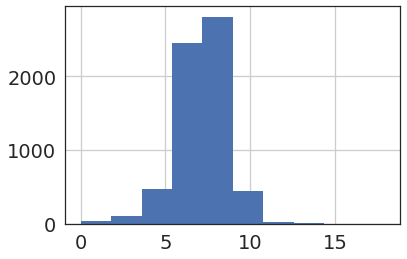

In [35]:
birth_weight.hist()

In [36]:
# ValueError: cannot convert float NaN to integer
# can't handle NaN
    
#sns.distplot(birth_weight)

In [37]:
import warnings
warnings.simplefilter('ignore', UserWarning)

Text(0,0.5,'PDF')

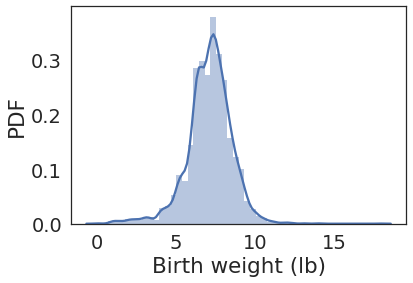

In [39]:
# ValueError: max must be larger than min in range parameter.
# plt.hist can't handle NaN
    
sns.distplot(birth_weight.dropna())
plt.xlabel('Birth weight (lb)')
plt.ylabel('PDF')
#plt.title('NSFG 2013-15 Live Births')

Text(0,0.5,'Number of births')

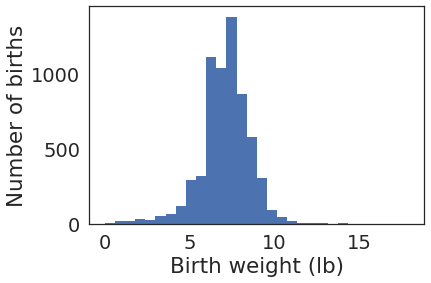

In [44]:
# ValueError: max must be larger than min in range parameter.
# plt.hist can't handle NaN
    
plt.hist(birth_weight.dropna(), bins=30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Number of births')
#plt.title('NSFG 2013-15 Live Births')

### prglngth



In [53]:
nsfg['prglngth'].value_counts().sort_index()

0        7
1       11
2       50
3      102
4      274
5      128
6      375
7      185
8      299
9      331
10     125
11      82
12     132
13     222
14      39
15      27
16      40
17      85
18      25
19      25
20      21
21       9
22      76
23       7
24      25
25      13
26      58
27      17
28      39
29      25
30      95
31      15
32     118
33      35
34      73
35     239
36     313
37     432
38     755
39    2384
40    1311
41     422
42     231
43      65
44       9
45       3
46       3
48       1
Name: prglngth, dtype: int64

In [45]:
preterm = nsfg['prglngth'] < 37

In [46]:
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [47]:
type(preterm)

pandas.core.series.Series

In [48]:
preterm.sum()

3742

In [49]:
preterm.mean()

0.39987176747168196

In [54]:
filtered = birth_weight[preterm]
filtered.mean()

5.577598314606742

In [55]:
filtered2 = birth_weight[~preterm]
filtered2.mean()

7.372323879231473

In [ ]:
full_term_weight = nsfg.loc[~preterm, 'birth_weight']

In [ ]:
sns.distplot(full_term_weight.dropna())
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.title('NSFG 2013-15 Live Births')

In [ ]:
full_term_weight.mean()

## nbrnaliv

https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/815953?studyNumber=9999&vg=10264

In [ ]:
nsfg['nbrnaliv'].value_counts()

In [ ]:
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

In [ ]:
single = nsfg['nbrnaliv'] == 1

In [ ]:
single.head()

In [ ]:
single.sum()

In [ ]:
single.mean()

In [ ]:
(~preterm & single).sum()

In [ ]:
(~preterm & single).mean()

In [ ]:
full_term_single_weight = nsfg.loc[~preterm & single, 'birth_weight']

In [ ]:
full_term_single_weight.mean()

In [ ]:
~single.sum()

In [ ]:
full_term_multiple_weight = nsfg.loc[~preterm & ~single, 'birth_weight']

In [ ]:
full_term_multiple_weight.mean()

In [ ]:
sns.distplot(full_term_weight.dropna())
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.title('NSFG 2013-15 Live Births')

## Exercises

In [ ]:
nsfg['agepreg'].describe()

In [ ]:
agepreg = nsfg['agepreg'] / 100

In [ ]:
agecon = nsfg['agecon'] / 100

In [ ]:
agepreg - agecon

In [ ]:
agecon.mean() / 100

In [ ]:
live = nsfg['outcome'] == 1

In [ ]:
live.sum()

In [ ]:
live.mean()

In [ ]:
agecon = nsfg.loc[live, 'agecon'] / 100

In [ ]:
agecon.describe()

In [ ]:
sns.distplot(agecon.dropna())
plt.xlabel("Mother's age at conception")
plt.ylabel('Fraction of births')
plt.title('NSFG 2013-15 Live Births')